# Programming Assignment: Clustering

This week we will be working with **Clustering**: we will implement **K-Means** algorithm.  
Let's take a look at original five tasks presented in Russian.

**Tasks will be duplicated in english further in this assignment**

1.  Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.
2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.
3. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.
4. Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно (см. определение).
5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

In [1]:
import numpy as np

from sklearn.cluster import KMeans
import pylab
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

import pandas

## Task №1
*Ru*: Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

*En:* Load the picture parrots.jpg. Convert the image, bringing all values in the range from 0 to 1. To do this, you can use the img_as_float function from the skimage module. Pay attention to this step, as you will get an incorrect result when working with the original image. 

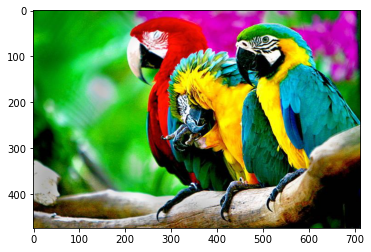

In [2]:
image = pylab.imread('parrots.jpg')
pylab.imshow(image)

In [3]:
data =  skimage.img_as_float(image)
print(np.max(data), np.min(data))
data.shape

1.0 0.0


(474, 713, 3)

## Task №2
*Ru*:  Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

*En:* Create a matrix of feature objects: characterize each pixel with three coordinates - intensity values in RGB space. 

In [4]:
w, h, d = data.shape
df = pandas.DataFrame(np.reshape(data, (w*h,d)), columns= ['R', 'G', 'B'] )
df.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


## Task №3
*Ru*: Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.


*En:* Run the K-Means algorithm with init = 'k-means ++' and random_state = 241 parameters. After selecting the clusters, try to fill all pixels assigned to one cluster in two ways: the median color and the average color for the cluster. 

In [5]:
model = KMeans( init='k-means++', random_state=241)
df['cluster'] = model.fit_predict(df)
model.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [6]:
means = df.groupby('cluster').mean().values
mean_pixels = []
for x in df['cluster']:
    mean_pixels.append(means[x]) 
mean_pixels

[array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.06693434]),
 array([0.09573358, 0.63583673, 0.

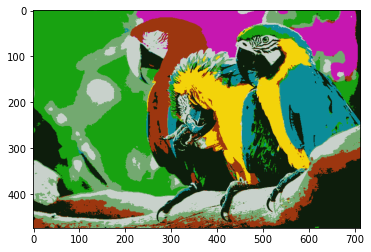

In [7]:
mean_image = np.reshape(mean_pixels, (w,h,d))
pylab.imshow(mean_image)

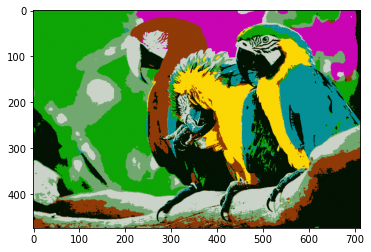

In [8]:
medians = df.groupby('cluster').median().values
median_pixels = [medians[x] for x in df['cluster']]
median_image = np.reshape(median_pixels, (data.shape[0],data.shape[1],data.shape[2]))
pylab.imshow(median_image)

In [9]:
#summing up as a function
def images_predict(df, data, n_clusters=None):
    model = KMeans(init='k-means++', random_state=241, n_clusters = n_clusters)
    df['cluster'] = model.fit_predict(df)
    
    means = df.groupby('cluster').mean().values
    mean_pixels = [means[x] for x in df['cluster']]
    mean_image = np.reshape(mean_pixels, (data.shape[0],data.shape[1],data.shape[2]))
    pylab.imshow(mean_image)
    
    medians = df.groupby('cluster').median().values
    median_pixels = [medians[x] for x in df['cluster']]
    median_image = np.reshape(median_pixels, (data.shape[0],data.shape[1],data.shape[2]))
    pylab.imshow(median_image)
    return mean_image, median_image

## Task №4
*Ru*: Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно (см. определение).

*En:* Measure the quality of the resulting segmentation using the PSNR metric. You must implement this metric yourself.

In [10]:
def PSNR(data, m_data):
    return 10 * np.log10(np.max(data) / np.mean((data - m_data) ** 2))

## Task №5
*Ru*: Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

*En:* Find the minimum number of clusters for which the PSNR value is higher than 20 (you can consider no more than 20 clusters, but do not forget to consider both ways of filling the pixels of one cluster). This number will be the answer in this problem. 


n_clusters = 1
PSNR median 9.427840460507397 
PSNR mean 9.818835544771293

n_clusters = 2
PSNR median 11.65095873738933 
PSNR mean 12.080135789203524

n_clusters = 3
PSNR median 12.569128613805784 
PSNR mean 13.050669716965992

n_clusters = 4
PSNR median 13.675162566661488 
PSNR mean 14.217634128742336

n_clusters = 5
PSNR median 14.732733298091578 
PSNR mean 15.24570260277512

n_clusters = 6
PSNR median 15.475018969707527 
PSNR mean 15.954637296353777

n_clusters = 7
PSNR median 16.157818737532867 
PSNR mean 16.719550445300943

n_clusters = 8
PSNR median 17.013111064005745 
PSNR mean 17.6082794050331

n_clusters = 9
PSNR median 18.0159375322352 
PSNR mean 18.430723876857133

n_clusters = 10
PSNR median 18.464440187583733 
PSNR mean 18.82702908631765

n_clusters = 11
PSNR median 18.84602272361393 
PSNR mean 19.23801308928219

n_clusters = 12
PSNR median 19.203816964886997 
PSNR mean 19.537022833785926

n_clusters = 13
PSNR median 19.561042544814622 
PSNR mean 19.81837733774502
PSNR is

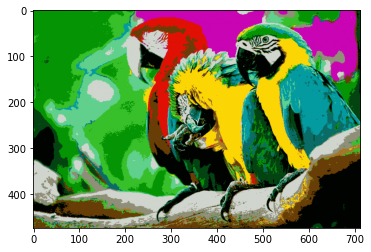

In [11]:
for n_clusters in range(1,21):
    mean_image, median_image = images_predict(df, data, n_clusters)
    psnr_mean = PSNR(data, mean_image)
    psnr_median = PSNR(data, median_image) 
    
    if psnr_median > 20 or psnr_mean > 20:
        print("PSNR is more than 20, n_clusters=", n_clusters)
        print("PSNR median", psnr_median, "\nPSNR mean", psnr_mean)
        break
        
    print("\nn_clusters =", n_clusters) 
    print("PSNR median", psnr_median, "\nPSNR mean", psnr_mean)
    #pylab.imshow(median_image)
    #pylab.imshow(mean_image)